In [4]:
# импорт библиотек

import os

import pandas as pd

from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

import statistics

import matplotlib.pyplot as plt

In [5]:
file_path = 'C:/00_Data/'

In [6]:
work_mos = pd.read_excel(file_path + 'average_profit.xlsx', sheet_name='mos')

In [7]:
work_mos.shape

(3034, 8)

In [8]:
work_mos.head()

,inn,profit_2018,profit_2019,profit_2020,prodoctorov,docdoc,napopravku,aggr_number
0,ИНН: 7602156079,0,0,-798,1,0,1,2
1,ИНН: 7715203435,5715,7792,12,1,0,1,2
2,ИНН: 7715209821,116,188,16,0,0,0,0
3,ИНН: 7715211034,-101279,16579,4037,0,0,0,0
4,ИНН: 7715218921,-8,-8,109,0,0,0,0


In [9]:
work_mos.describe()

,profit_2018,profit_2019,profit_2020,prodoctorov,docdoc,napopravku,aggr_number
count,3034.000000,3.034000e+03,3.034000e+03,3034.000000,3034.000000,3034.000000,3034.000000
mean,3474.846407,3.998302e+03,3.899422e+03,0.430455,0.088991,0.256757,0.776203
std,30218.832944,3.223937e+04,3.652688e+04,0.495221,0.284778,0.436916,0.880054
min,-283162.000000,-2.277890e+05,-5.887050e+05,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-4.500000e+01,-1.907500e+02,0.000000,0.000000,0.000000,0.000000
50%,69.000000,1.870000e+02,2.240000e+02,0.000000,0.000000,0.000000,1.000000
75%,1274.500000,1.704500e+03,2.037750e+03,1.000000,0.000000,1.000000,1.000000
max,946934.000000,1.014132e+06,1.196198e+06,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

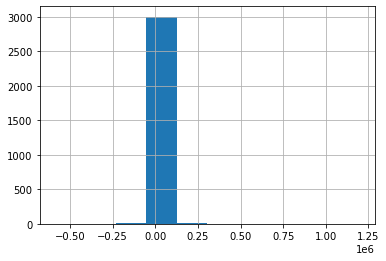

In [10]:
work_mos['profit_2020'].hist()

In [11]:
total_mean = work_mos['profit_2020'].mean()
total_median = work_mos['profit_2020'].median()
total_mode = work_mos['profit_2020'].mode()

In [12]:
print('Среднее: ' + str(total_mean))
print('Медиана: ' + str(total_median))
print('Мода: ' + str(total_mode))

Среднее: 3899.4222148978247
Медиана: 224.0
Мода: 0    0
dtype: int64


## Оставляю только прибыльные клиники

In [14]:
work_mos = work_mos[work_mos['profit_2020'] > 0]

In [15]:
work_mos.shape

(2012, 8)

In [16]:
print('Среднее: ' + str(work_mos['profit_2020'].mean()))
print('Медиана: ' + str(work_mos['profit_2020'].median()))
print('Мода: ' + str(work_mos['profit_2020'].mode()))

Среднее: 7922.416500994036
Медиана: 1108.0
Мода: 0    4488
dtype: int64


In [17]:
#work_mos.to_excel(file_path + 'temp.xlsx', index=False)

In [18]:
work_mos.sample()

,inn,profit_2018,profit_2019,profit_2020,prodoctorov,docdoc,napopravku,aggr_number
1443,ИНН: 7730006142,8931,7647,8068,1,0,0,1


### Создаю выборки

In [31]:

# клиники, не размещающиеся на агрегаторах
no_aggr = work_mos[work_mos['aggr_number'] == 0]['profit_2020'].to_list()

# клиники, которые пользуются хотя бы одним агрегатором
more_aggr = work_mos[work_mos['aggr_number'] > 0]['profit_2020'].to_list()

# клиники, которые размещаются только на prodoctorov
prodoctorov = work_mos[((work_mos['prodoctorov'] == 1) &
                        (work_mos['aggr_number'] == 1))]['profit_2020'].to_list()

# клиники, которые размещаются только на docdoc
docdoc = work_mos[((work_mos['docdoc'] == 1) &
                        (work_mos['aggr_number'] == 1))]['profit_2020'].to_list()

# клиники, которые размещаются только на napopravku
napopravku = work_mos[((work_mos['napopravku'] == 1) &
                        (work_mos['aggr_number'] == 1))]['profit_2020'].to_list()

# клиники, которые размещаются на всех трех агрегаторах
all_aggr = work_mos[work_mos['aggr_number'] == 3]['profit_2020'].to_list()

# клиники, которые размещаются на prodoctorov и doc-doc
pr_doc_aggr = work_mos[((work_mos['prodoctorov'] == 1) &
                        (work_mos['docdoc'] == 1) &
                        (work_mos['aggr_number'] == 2))]['profit_2020'].to_list()

# клиники, которые размещаются на prodoctorov и napopravku
pr_nap_aggr = work_mos[((work_mos['prodoctorov'] == 1) &
                        (work_mos['napopravku'] == 1) &
                        (work_mos['aggr_number'] == 2))]['profit_2020'].to_list()

# клиники, которые размещаются на doc-doc и napopravku
doc_nap_aggr = work_mos[((work_mos['napopravku'] == 1) &
                        (work_mos['docdoc'] == 1) &
                        (work_mos['aggr_number'] == 2))]['profit_2020'].to_list()

### Создаю словарь выборок

Чтобы посчитать нужные статистики автоматом

In [39]:
# список имен выборок
sample_list = ['no_aggr', 'more_aggr', 'prodoctorov', 'docdoc', 'napopravku',
               'all_aggr', 'pr_doc_aggr', 'pr_nap_aggr', 'doc_nap_aggr']

# словарь выборок
sample_dict = {'no_aggr': no_aggr, 'more_aggr': more_aggr,
               'prodoctorov': prodoctorov, 'docdoc': docdoc,
               'napopravku':napopravku,
               'all_aggr': all_aggr, 'pr_doc_aggr': pr_doc_aggr,
               'pr_nap_aggr': pr_nap_aggr, 'doc_nap_aggr': doc_nap_aggr}

# список статистик
operation_list = [statistics.mean, statistics.median, statistics.mode, statistics.pvariance, statistics.pstdev]

### Создаю датафрейм со статистиками

In [40]:
temp_data = []

for i in sample_list:
    temp_list = []
    
    temp_list.append(i)
    
    for item in operation_list:
        temp_list.append(round(item(sample_dict[i]), 0))
    
    temp_data.append(temp_list)

In [41]:
work = pd.DataFrame(temp_data, columns=['sample', 'mean', 'median', 'mode', 'variance', 'std'])

In [42]:
work

,sample,mean,median,mode,variance,std
0,no_aggr,8243.0,699.0,4488,2.800493e+09,52920.0
1,more_aggr,7669.0,1540.0,1,6.437368e+08,25372.0
2,prodoctorov,4918.0,1238.0,1215,1.671306e+08,12928.0
3,docdoc,15635.0,3426.0,3136,1.458504e+09,38190.0
4,napopravku,4852.0,990.0,58,1.638849e+08,12802.0
5,all_aggr,12797.0,3374.0,575,1.132326e+09,33650.0
6,pr_doc_aggr,6505.0,2260.0,8348,1.916619e+08,13844.0
7,pr_nap_aggr,9187.0,1690.0,1,1.147697e+09,33878.0
8,doc_nap_aggr,28022.0,3404.0,3092,3.032335e+09,55067.0


In [44]:
work.to_excel(file_path + 'temp.xlsx', index=False)